# [LAB 13] 2. 시계열 데이터의 탐색
- 시계열의 구조와 흐름을 이해하기 위한 탐색적 방법

|종류|특징|설명
|--|--|--|
|평균이동법|시각적 패턴 파악|과거로부터 현재까지의 시계열 데이터를 대상으로 일정기간 이동 평균을 계싼하고, 이들의 추세를 파악하여 다음 기간을 예측|
|지수평활법|EDA와 CDA의 경계|일정기간의 평균을 이용하는 이동평균법과 달리 모든 시계열 자표를 사용하는 평균을 구한다. 시간의 흐름에 따라 최근 시계열에 더 많은 가중치를 부여하여 미래를 예측하는 방법|
|분해시계열|구조적이해|시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법|



*평균이동법 > 원본 데이터 , 차분된 데이터 모두 시행해야함 
*지수평활법 > 단기예측에 좋음 (시즈널리티 변화에 좀 더 민감해)



### #01.준비 작업
#### 1.라이브러리 참조
평균이동법,지수평활법을 위한 별도의 패키지는 필요하지 않다

In [1]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

# 데이터 정상성 확인을 위한 ADF 검정
from statsmodels.tsa.stattools import adfuller

#시계열 분해 패키지
from statsmodels.tsa.seasonal import seasonal_decompose

#### 2.그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3.데이터 가져오기
- 월간 항공 승객 수

In [3]:
origin = load_data('air_passengers')

print("\n==== 데이터 크기 확인 ====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n==== 타입확인 ====")
print(origin.info())


[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

==== 데이터 크기 확인 ====
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144

==== 타입확인 ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


### #02.데이터 전처리
#### 1.시계열 인덱스 설정

In [4]:
df1=origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### 2.차분
- 정상성을 확보할 떄까지 차분을 수행한다


=== 0 차 차분 ===


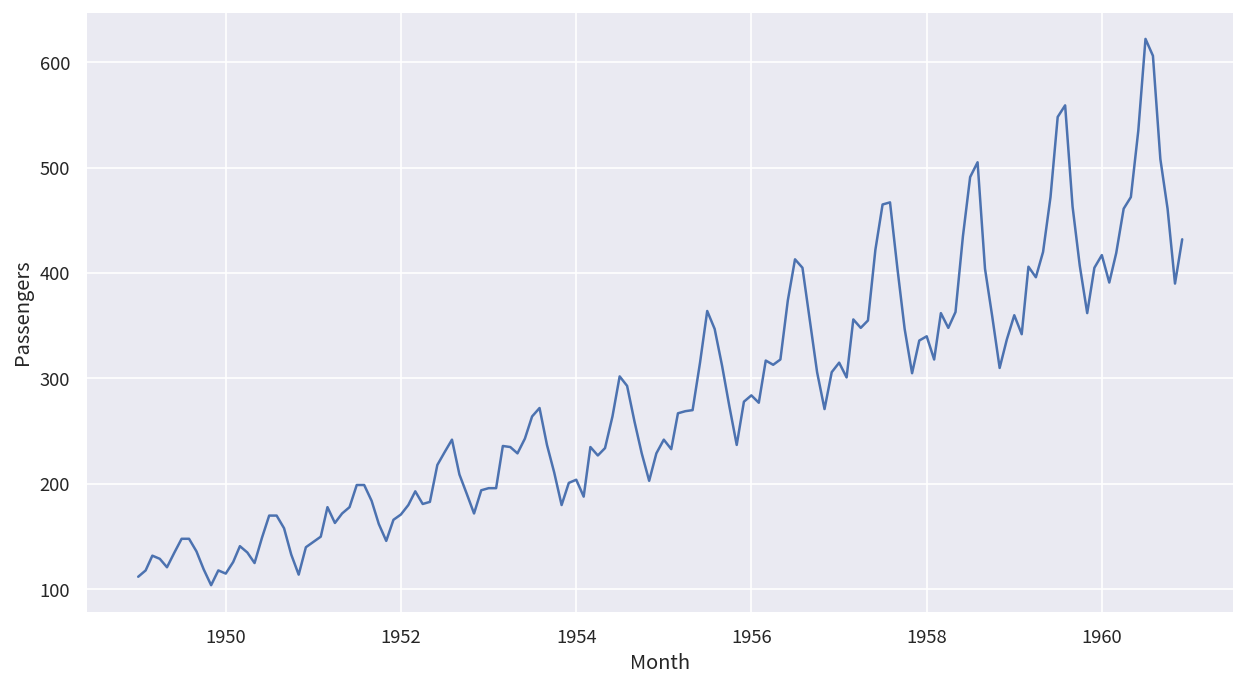

,0
ADF Statistic,0.815369
p-value,0.99188
num of lags,13
num of observations,130
result,False


=== 1 차 차분 ===


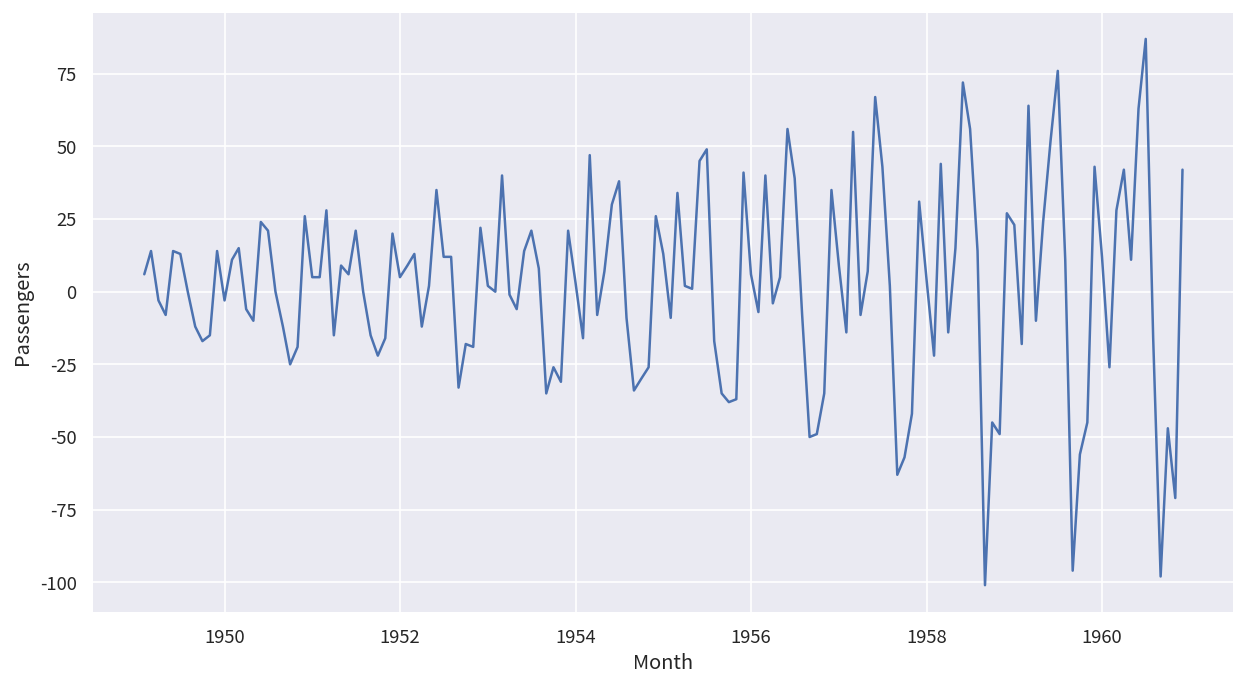

,0
ADF Statistic,-2.829267
p-value,0.054213
num of lags,12
num of observations,130
result,False


=== 2 차 차분 ===


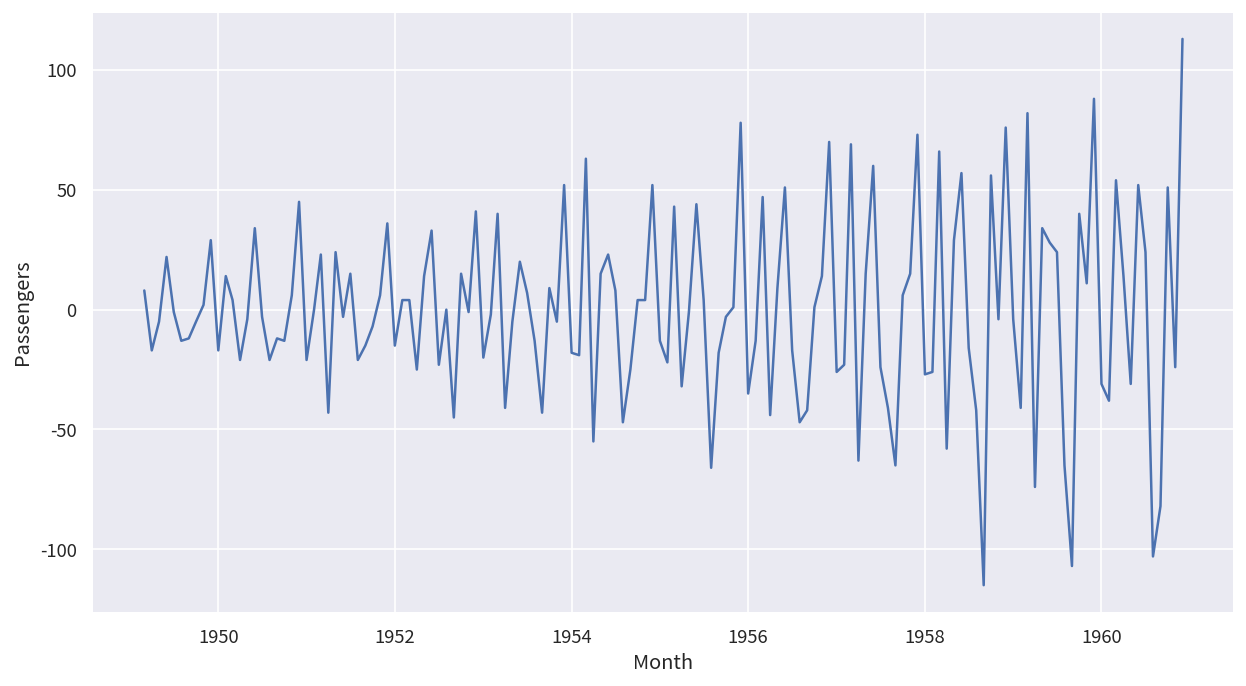

,0
ADF Statistic,-16.384232
p-value,0.0
num of lags,11
num of observations,130
result,True


In [5]:
diff_df = df1.copy()
yname ='Passengers'
count=0

while True:
  print(f"=== {count} 차 차분 ===")
  #시계열 그래프
  
  # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
  width_px = 1280              # 그래프 가로 크기
  height_px = 720              # 그래프 세로 크기
  rows = 1                     # 그래프 행 수
  cols = 1                     # 그래프 열 수
  figsize = (width_px / my_dpi, height_px / my_dpi)
  fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

  # 2) 그래프 그리기 -> seaborn 사용
  sb.lineplot(
      data=diff_df, x=diff_df.index, y='Passengers',
  )

  # 3) 그래프 꾸미기
  ax.grid(True)                          # 배경 격자 표시/숨김


  # 4) 출력
  plt.tight_layout()                     # 여백 제거
  plt.savefig("plot.png", dpi=my_dpi * 2)
  plt.show()                             # 그래프 화면 출력
  plt.close()                            # 그래프 작업 종료



  ar = adfuller(diff_df[yname])
  ar_dict ={
    'ADF Statistic' : ar[0],
    'p-value' : ar[1],
    'num of lags' : ar[2],
    'num of observations' : ar[3]

  }

  ar_dict['result'] = True if ar[1] <= 0.05 else False

  adf = DataFrame([ar_dict]).T
  display(adf)


  #정상성 충족이라면 반복 중단
  if ar[1] <= 0.05:
    break


  #정상성이 충족되지 않았다면 차분 수행 후 다시 수행
  count +=1
  diff_df = diff_df.diff().dropna()



### #03.평균 이동법
가장 고전적인 시계열 데이터 분석 방법
일정 기간의 데이터를 묶어 평균값으로 부드럽게 만드는 방법이다.

주어진 구간의 평균을 구해서 이어서 표시하는 것으로 미래의 데이터를 예측한다

짧은 기간의 요동을 줄이고 전체적인 흐름을 보기 위해 사용한다
평균을 구하기 위한 구간은 분석가가 임의로 정해야 한다.
평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단한다


<목적>
- 단기 변동(노이즈) 제거 (데이터 평탄화)
- 추세를 시각적으로 확인

<특징>
- 모든 관측값을 동일하게 취급
- 계산이 매우 단순
- 변화에 느리게 반응함


<활용 상황>
- 시계열 데이터의 초기 탐색
- 그래프를 매끄럽게 표현할 때
- 데이터의 증감 경향을 확인하기위해 차분되지 않은 원본 데이터로 하는 경우도 있음

#### [1] 차분되지 않은 원본에 대한 3개월, 6개월 , 9개월 평균
#### 평균이동 수행

In [8]:
df2 = df1.copy()

df2['rolling3'] = df2['Passengers'].rolling(3).mean()
df2['rolling6'] = df2['Passengers'].rolling(6).mean()
df2['rolling9'] = df2['Passengers'].rolling(9).mean()



df2.head(10)

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,131.000000


#### 시계열 그래프 확인

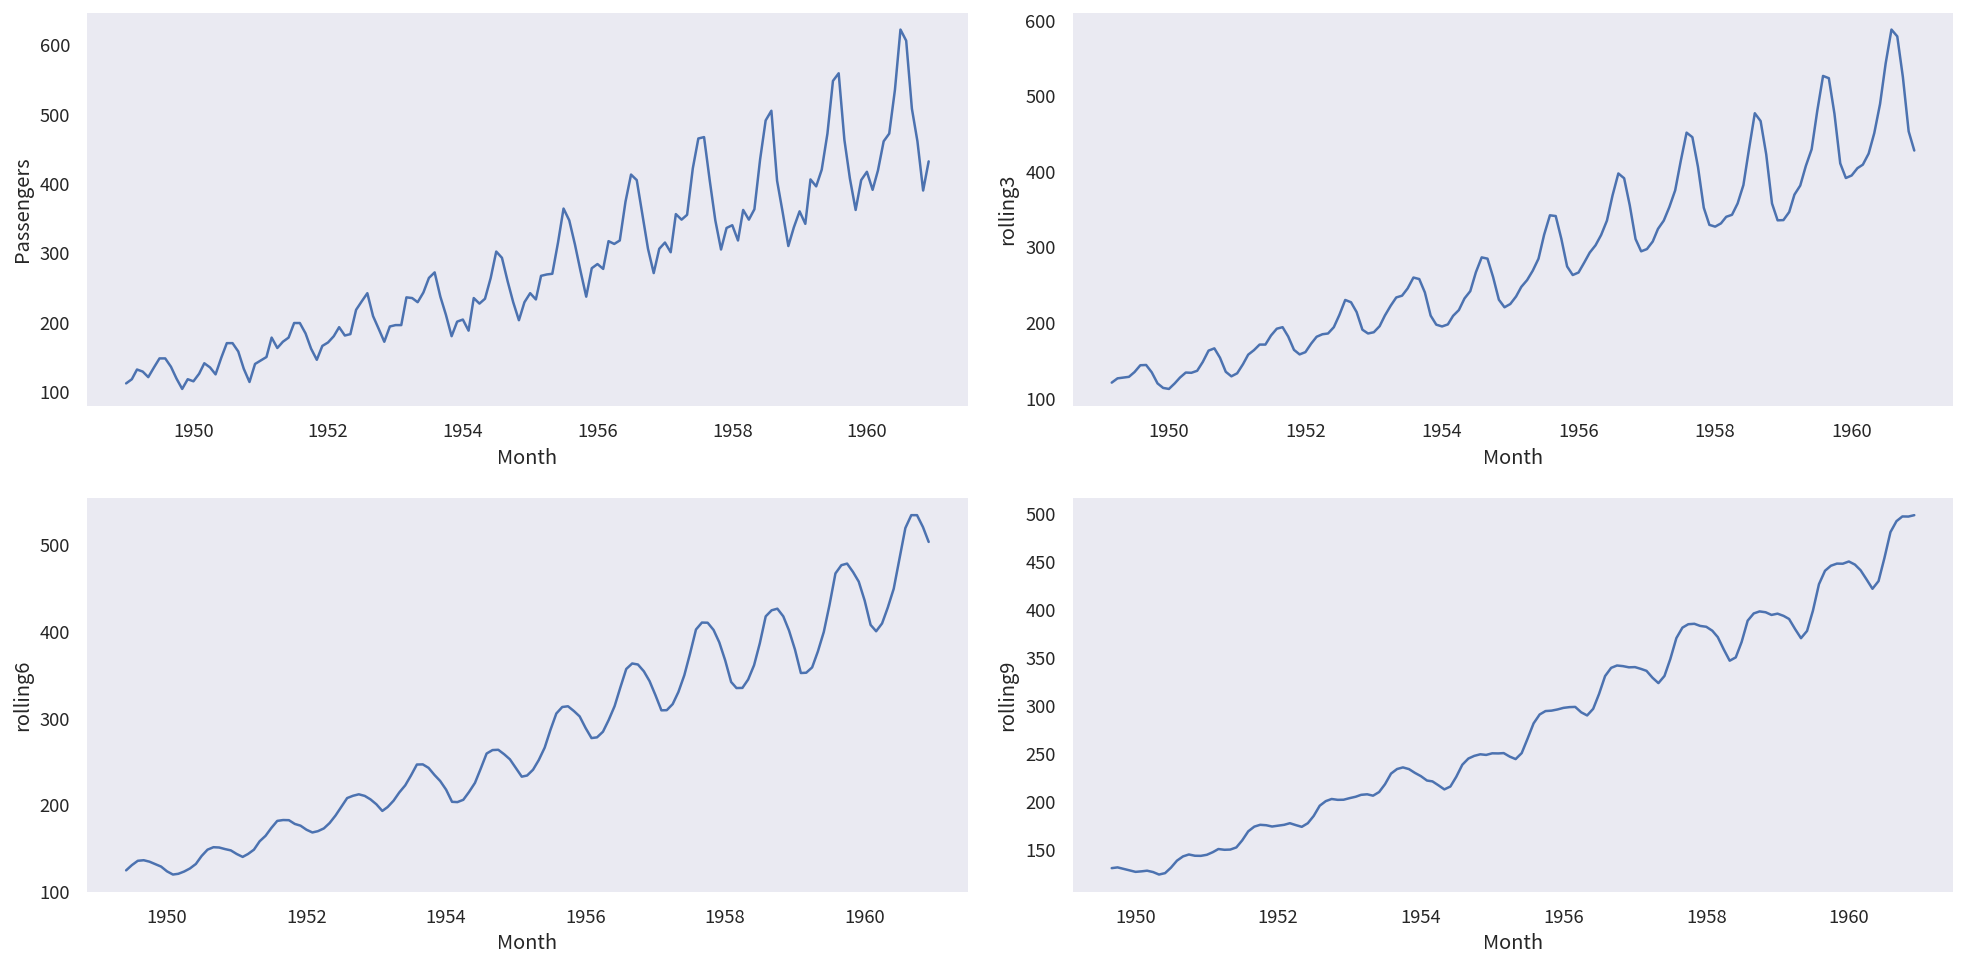

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000              # 그래프 가로 크기
height_px = 1000              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.lineplot(df2,x=df2.index,y='Passengers',ax=ax[0][0])
sb.lineplot(df2,x=df2.index,y='rolling3',ax=ax[0][1])
sb.lineplot(df2,x=df2.index,y='rolling6',ax=ax[1][0])
sb.lineplot(df2,x=df2.index,y='rolling9',ax=ax[1][1])  


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> 데이터의 평균을 이동하여 점점 더 그래프가 단순해진다. 이를 통해 월별 승객 수가 꾸준히 증가하는 추세라는 것을 알 수 있다
> 원본 데이터로 확인할 경우 전반적인 경향을 알 수 있다

#### [2] 차분된 데이터 대한 3개월, 6개월 , 9개월 평균

In [ ]:
df3 = diff_df.copy()

df3['rolling3'] = df3['Passengers'].rolling(3).mean()
df3['rolling6'] = df3['Passengers'].rolling(6).mean()
df3['rolling9'] = df3['Passengers'].rolling(9).mean()

df3.head()


,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-03-01,8.0,NaN,NaN,NaN
1949-04-01,-17.0,NaN,NaN,NaN
1949-05-01,-5.0,-4.666667,NaN,NaN
1949-06-01,22.0,0.000000,NaN,NaN
1949-07-01,-1.0,5.333333,NaN,NaN


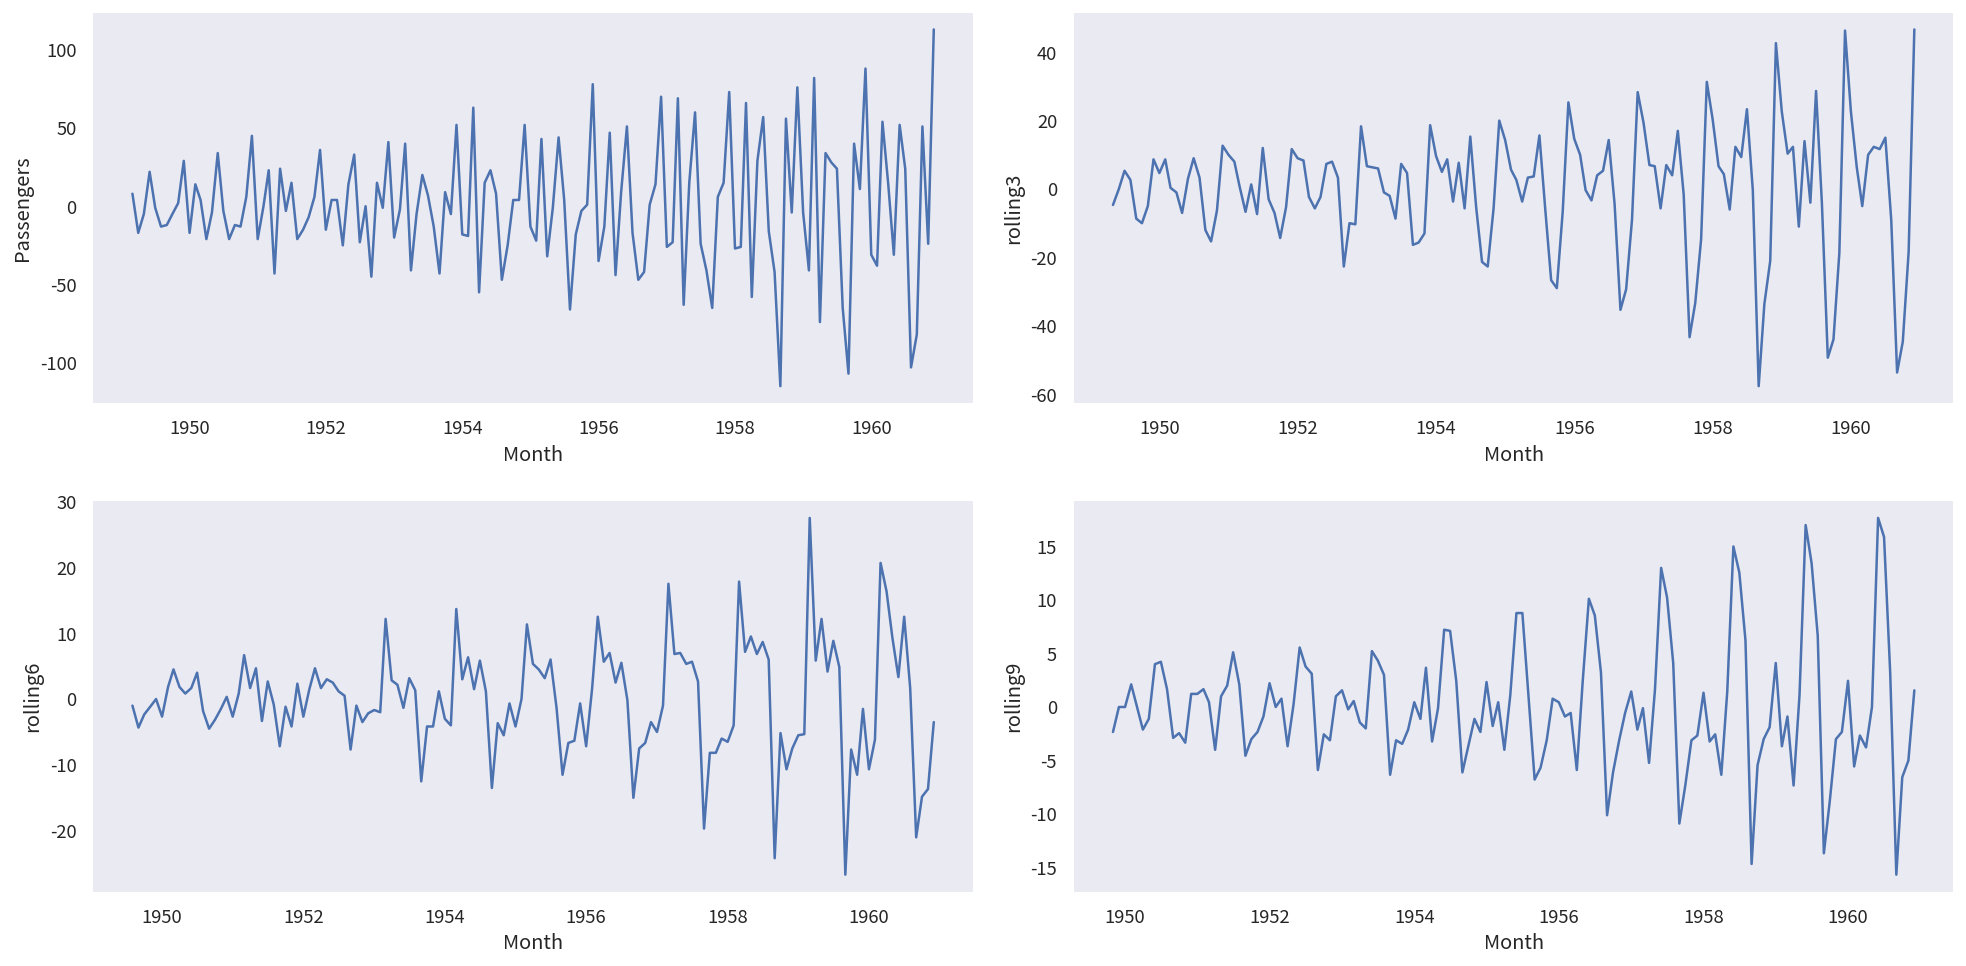

In [15]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000              # 그래프 가로 크기
height_px = 1000              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.lineplot(df3,x=df3.index,y='Passengers',ax=ax[0][0])
sb.lineplot(df3,x=df3.index,y='rolling3',ax=ax[0][1])
sb.lineplot(df3,x=df3.index,y='rolling6',ax=ax[1][0])
sb.lineplot(df3,x=df3.index,y='rolling9',ax=ax[1][1])  


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> 평균 이동을 할 수록, 그래프가 단순해져서 6개월 주기로 증감을 반복하는 트렌드가 있음을 알 수 있다

#### #04. 지수평활법
보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법
과거 데이터 전체를 활용하되, 최근 데이터에 더 큰 비중을 두는 기법이다


목적
- 최근 변화 반영
- 단기 예측 안정화


특징
- 평균이동보다 반응 속도가 빠름
- 데이터의 최근 흐름을 민감하게 반영
- 조정 가능한 평활 강도 존재

활용 상황
- 매출 수요 등 실무 예측
- 최근 변화가 중요한 데이터
- 빠른 의사결정이 필요한 경우

#### (1) 원본에 대한 지수 평활법


In [16]:
df4 = df1.copy()


df4['ewm3'] = df4['Passengers'].ewm(3).mean()
df4['ewm6'] = df4['Passengers'].ewm(6).mean()
df4['ewm9'] = df4['Passengers'].ewm(9).mean()

df4.head()



,Passengers,ewm3,ewm6,ewm9
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,115.428571,115.230769,115.157895
1949-03-01,132,122.594595,121.700787,121.372694
1949-04-01,129,124.937143,123.966516,123.590579
1949-05-01,121,123.646607,123.177832,122.957974


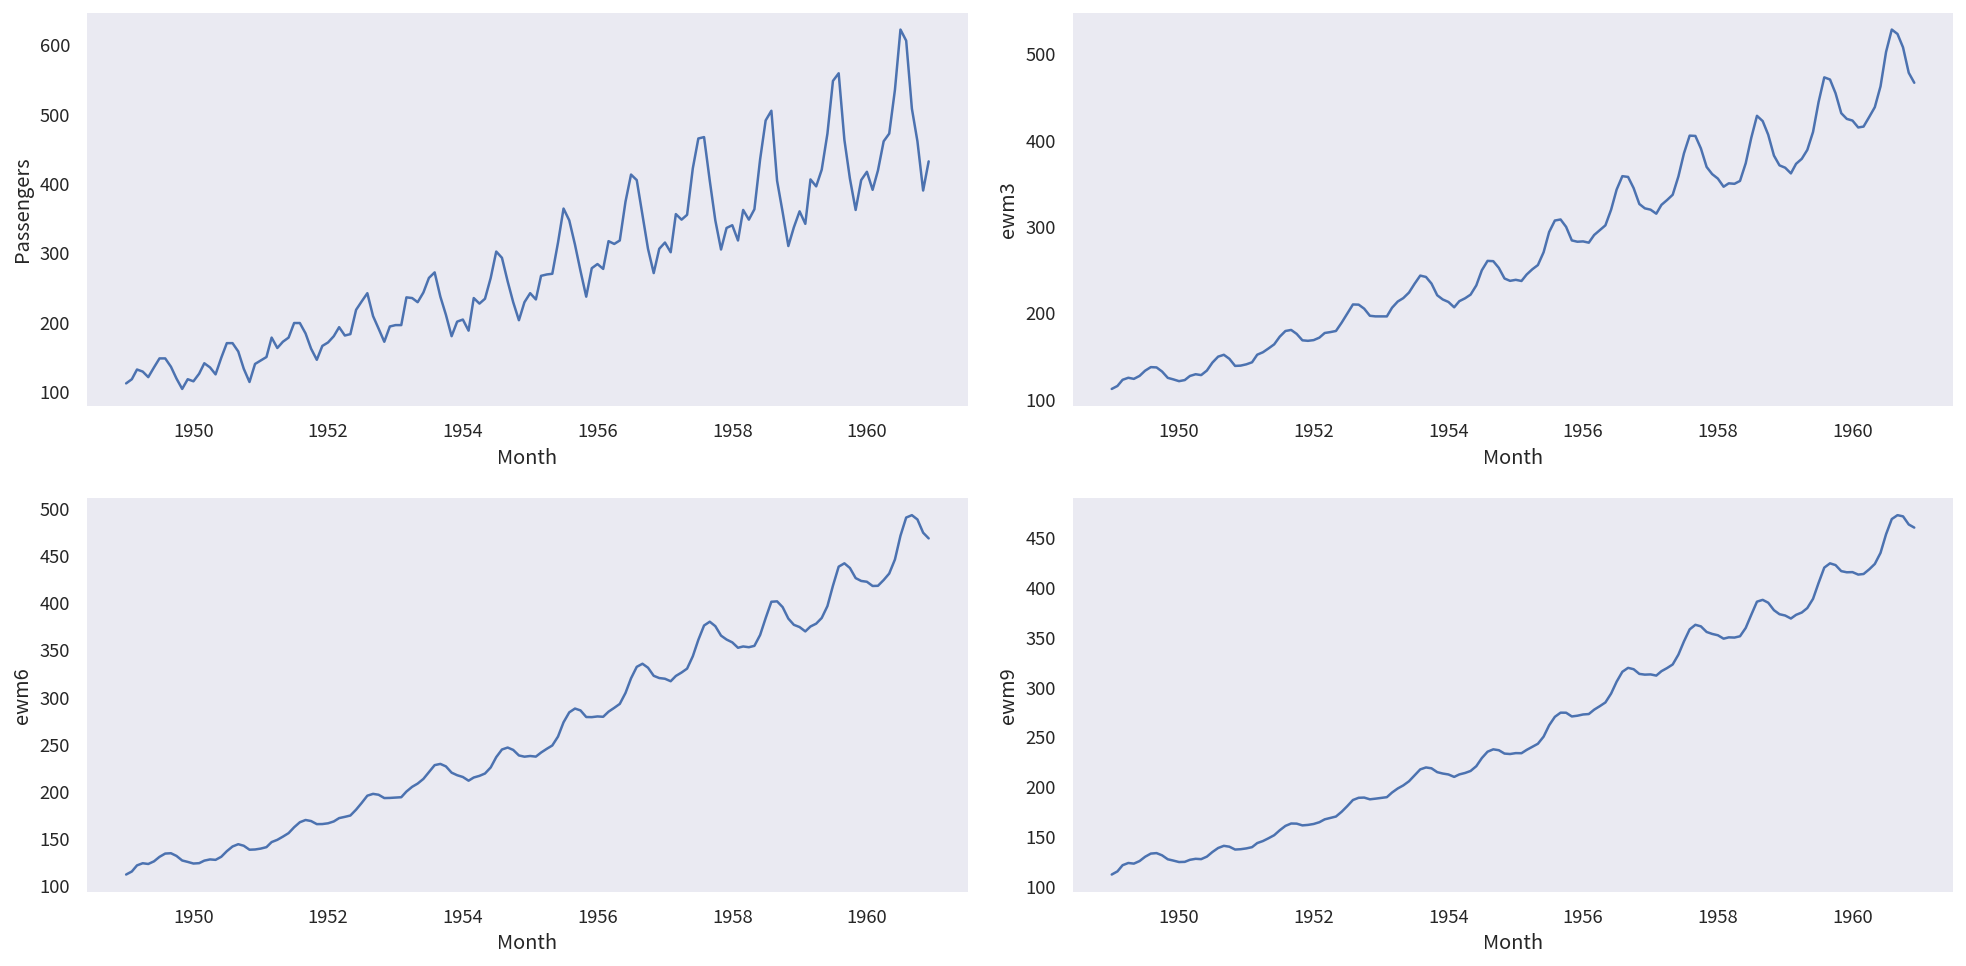

In [17]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000              # 그래프 가로 크기
height_px = 1000              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.lineplot(df4,x=df4.index,y='Passengers',ax=ax[0][0])
sb.lineplot(df4,x=df4.index,y='ewm3',ax=ax[0][1])
sb.lineplot(df4,x=df4.index,y='ewm6',ax=ax[1][0])
sb.lineplot(df4,x=df4.index,y='ewm9',ax=ax[1][1])  


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### (2) 차분 결과에 대한 지수 평활법
(객체 자체가 그래프를 내장하고 있음)

ax1 원본 / ax2 추세 / ax3 게절성 / ax4 불규칙성 ()


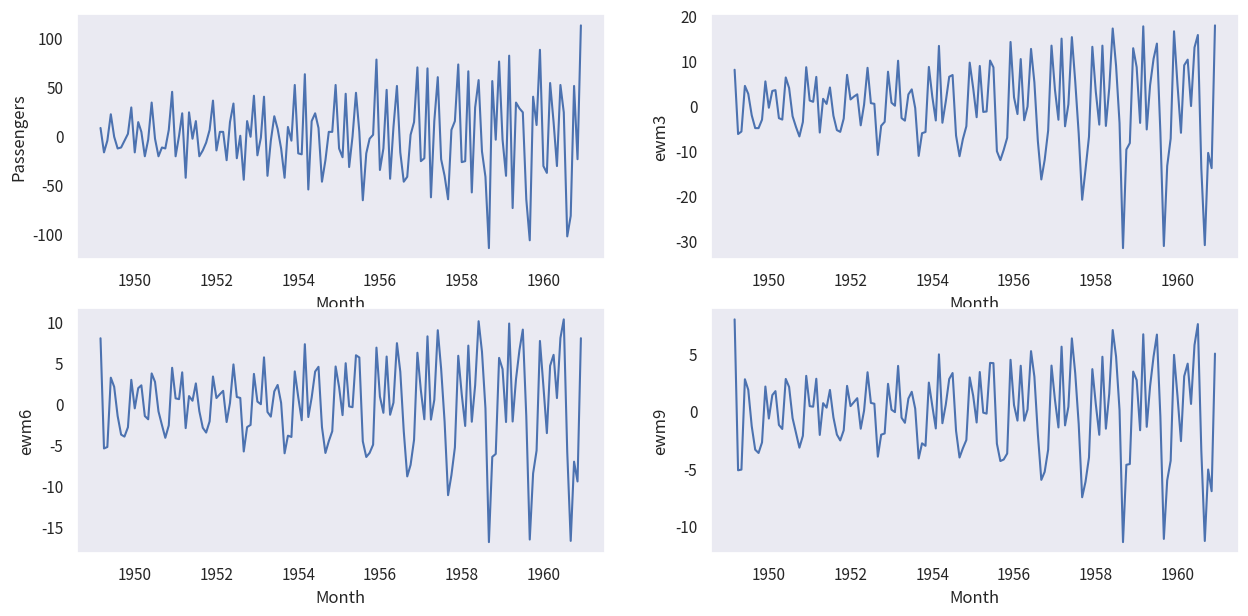

In [21]:
diff_df['ewm3'] = diff_df['Passengers'].ewm(3).mean()
diff_df['ewm6'] = diff_df['Passengers'].ewm(6).mean()
diff_df['ewm9'] = diff_df['Passengers'].ewm(9).mean()

fig, ((ax1,ax2) , (ax3,ax4)) = plt.subplots(2,2,figsize = (15,7))


sb.lineplot(diff_df , x= diff_df.index , y = 'Passengers' , ax=ax1)

sb.lineplot(diff_df , x= diff_df.index , y = 'ewm3' , ax=ax2)

sb.lineplot(diff_df , x= diff_df.index , y = 'ewm6' , ax=ax3)

sb.lineplot(diff_df , x= diff_df.index , y = 'ewm9' , ax=ax4)


plt.show()
plt.close()

> 평균이동법과 지수평활법은 시각화 결과물을 분석가의 주관대로 해석하는 방법이므로 추론통계보다는 탐색적 데이터 분석 과정에 더 가깝다

### #05. 분해 시계열
- 시계열에 영ㅎ야을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법
- 시계열 자료를 추세, 계절성, 잔차로 분해
- 하나의 시계열을 여러 구성 요소로 나누어 이해하는 접근이다


목적
- 시계열 구조 해석
- 변화 원인 설명


특징
- 장기 흐름, 반복 패턴, 불규칙 변동을 분리
- 예측보다 설명에 강점
- 시계열의 성격을 직관적으로 이해 가능


활용 상황
- 경제 정책 부동산 데이터 분석
- 왜 이런 패턴이 나타났는가를 설명할 때



적용 방법
|구분|설명|
|--|--|
|가법모델|시계열 데이터를 구성하는 각 성분이 덧셈을 통해 연결되어 있다고 가정|
|승법모델|각 성분이 곱셈을 통해 연결되어 있다고 가정. 승법 모델은 로그 변환을 통해 가법 모델로 쉽게 변환 가능함|



모델 선택은 시계열 데이터의 특성을 고려하면 되는데, 위 그림의 왼편 그래프와 같이 시간에 따른 데이터 변동이 일정한 경우는 가법 모델을 활용한 데이터 분해가 적합함



#### [1] 분해 시계열 생성
차분을 수행하기 전 원본을 가지고 하는 것이 원칙


In [22]:
#model_name = 'additive'       #가법 모델
model_name = 'multiplicative'  #승법 모델


#분해 시계열 객체 생성
sd = seasonal_decompose(df1['Passengers'] , model=model_name)

In [23]:
#trend, seasonal ,residual 데이터 프레임으로 변환

sd_df = DataFrame({
    'original' : sd.observed,
    'trend' : sd.trend,
    'seasonal':sd.seasonal,
    'resid':sd.resid


} ,index=origin.index) 


sd_df

,original,trend,seasonal,resid
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
139,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN


#### [2] 분해 시계열 시각화
- 전용 시각화 객체가 존재함

|요소|설명|
|--|--|
|추세요인|자료가 어떤 특정한 형태를 취할때|
|계절 요인|고정된 주기에 따라 자료가 변화|
|불규칙요인|회귀분석에서 잔차에 해당하는 요인|

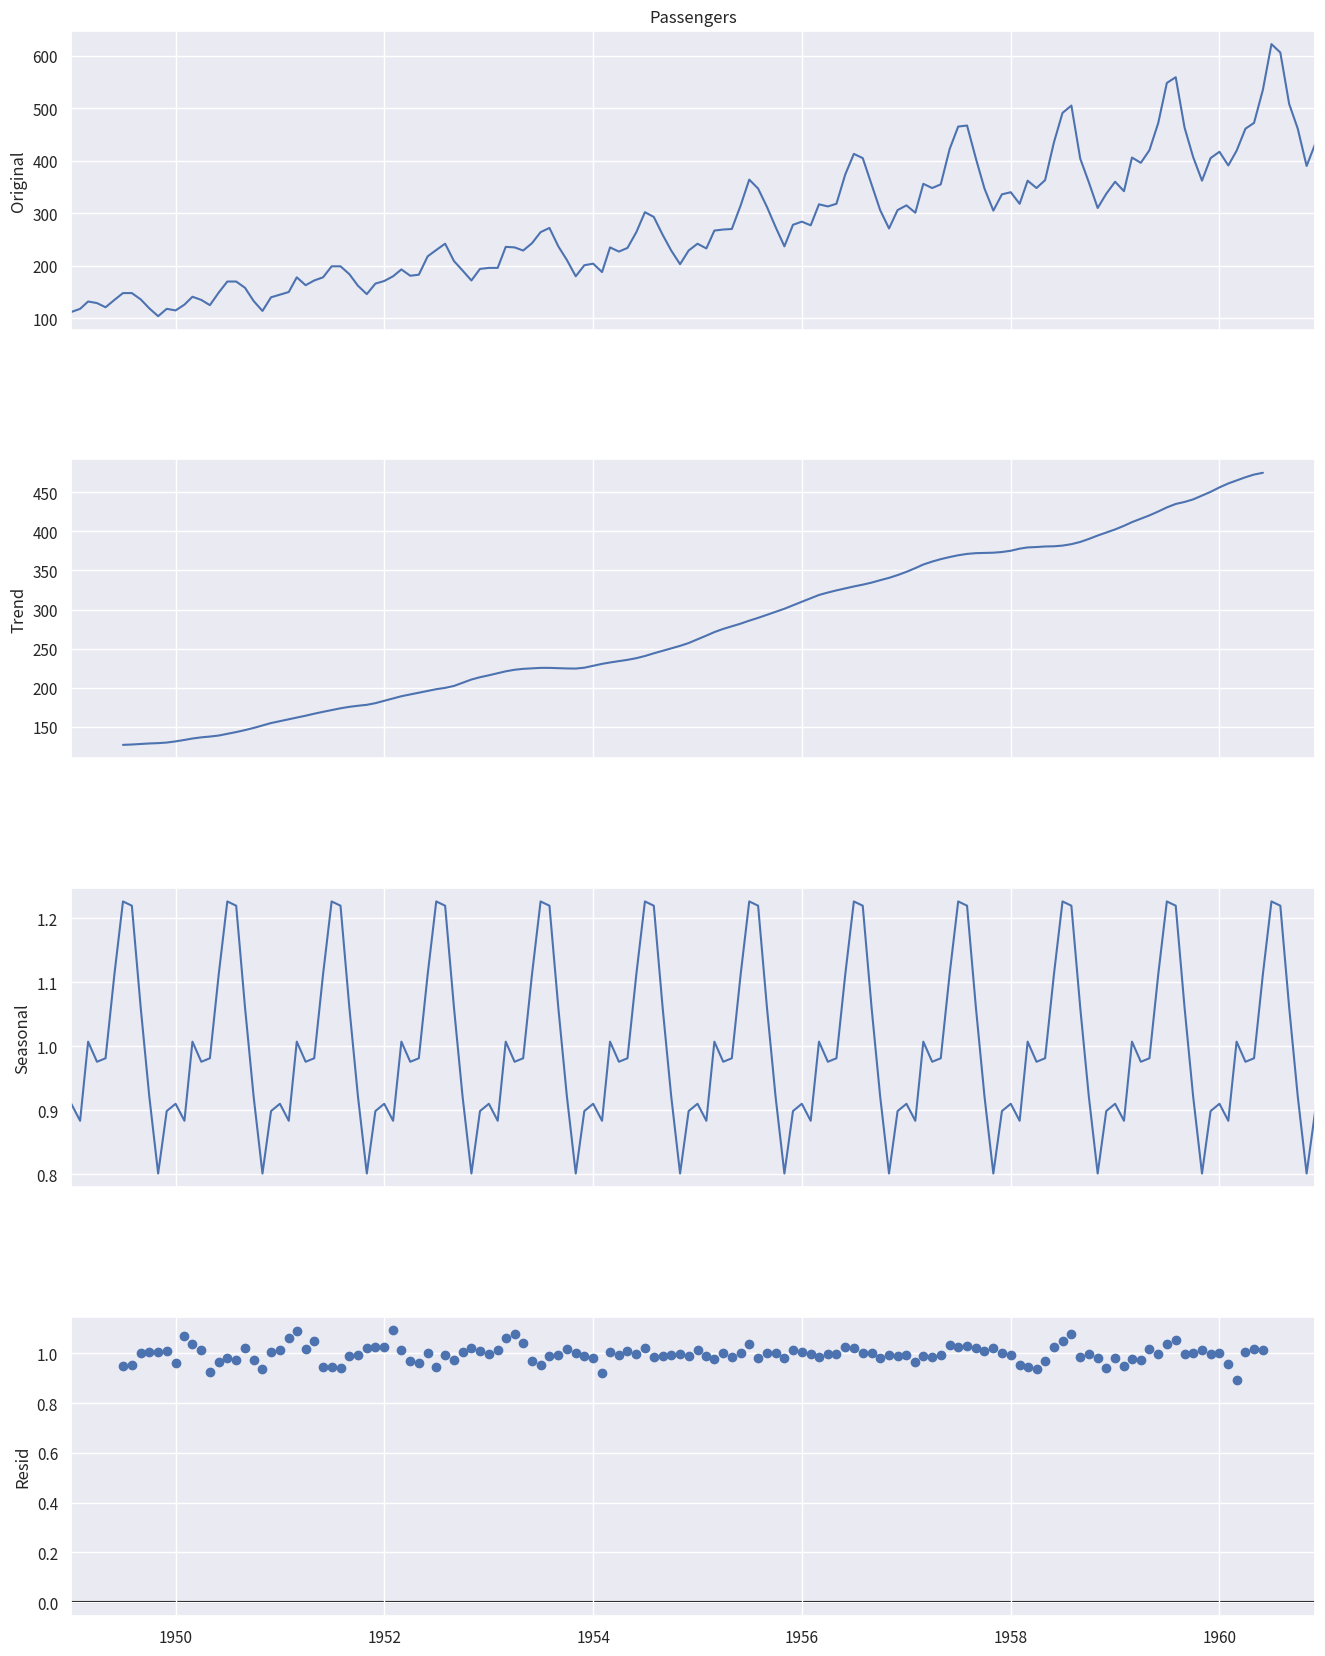

In [24]:
figure = sd.plot()
figure.set_size_inches((15,20))

fig,ax1,ax2,ax3,ax4 = figure.get_children()


ax1.set_ylabel('Original')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)


plt.show()
plt.close()

> 원본 데이터를 분해 했을 때 전반적으로 증가하는 추세 트렌드를 보이고 있으며, 1년 단위로 데이터 패턴이 반복되고 있다. 전체 평균은 1을 기준으로 크게 벗어나지 않는 잔차를 보이는 것으로 보아 분석 결과가 타당해 보인다